<a href="https://colab.research.google.com/github/phpastor/notebooks/blob/main/dryden.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1.00037910613743 -0.012776582052459339


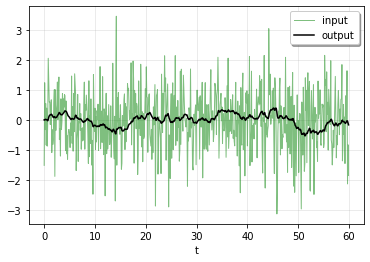

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import lsim

def turb_len(h):
  if h < 750:
    L1 = 82.5 * h**(1/3)
    Len = [L1, L1, h]
  else:
    Len = [750, 750, 750]
  return Len

def dryden_u(sigma, length, V):
  T = length / V
  K = sigma * np.sqrt(2 * T / np.pi)
  num = [K]
  den = [T, 1]
  return (num, den)

def dryden_vw(sigma, length, V):
  T = length / V
  K = sigma * np.sqrt(T / np.pi)
  num = [K * np.sqrt(3) * T, K]
  den = [T**2, 2 * T, 1]
  return (num, den)

sigma = 0.1 * 30 * 0.5144 # m/s
length = 750
V = 100

b, a = dryden_u(sigma, length, V)

t = np.linspace(0, 60, 600, endpoint=False)
rng = np.random.default_rng()
u = rng.standard_normal(600)

sigma_N = np.sqrt(sum(u * u) / len(u))
mean_N = sum(u) / len(u)
print(sigma_N, mean_N)

tout, yout, xout = lsim((b, a), U=u, T=t)

plt.plot(t, u, 'g', alpha=0.5, linewidth=1, label='input')
plt.plot(tout, yout, 'k', linewidth=1.5, label='output')
plt.legend(loc='best', shadow=True, framealpha=1)
plt.grid(alpha=0.3)
plt.xlabel('t')
plt.show()

In [ ]:
print(turb_len(1000))
print(turb_len(100))


[750, 750, 750]
[382.9310787730542, 382.9310787730542, 100]
